In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [6]:
import seaborn as sns

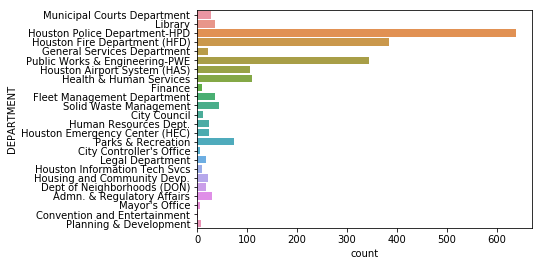

In [7]:
sns.countplot(y='DEPARTMENT', data=employee)

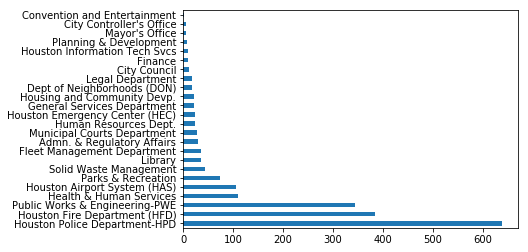

In [8]:
employee['DEPARTMENT'].value_counts().plot('barh')

C:\Users\Gita Perdani\Miniconda3\envs\name_of_my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


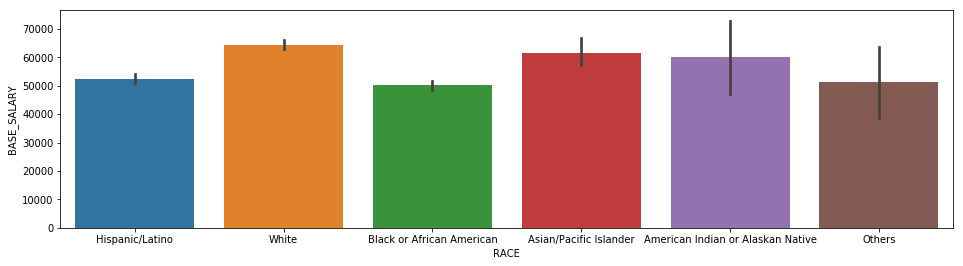

In [9]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(16, 4)

Text(0, 0.5, 'Mean Salary')

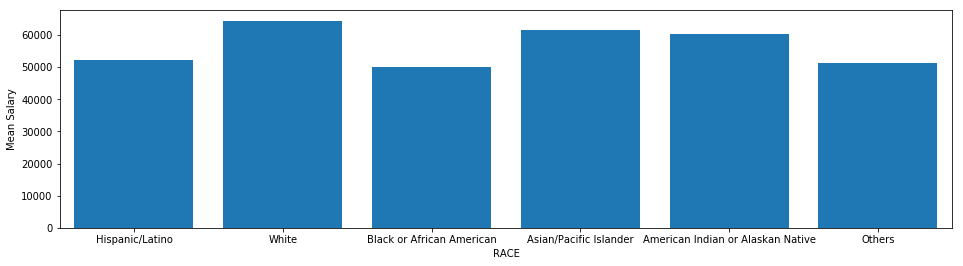

In [10]:
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary')

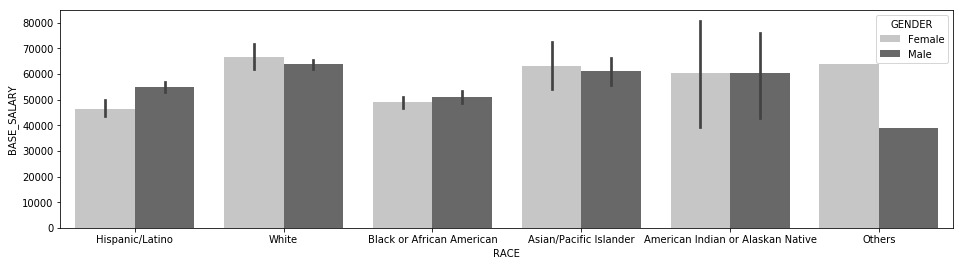

In [11]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER', 
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

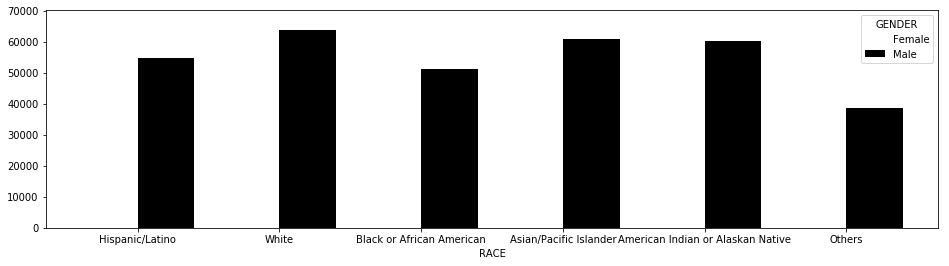

In [12]:
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'] \
        .mean().unstack('GENDER') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

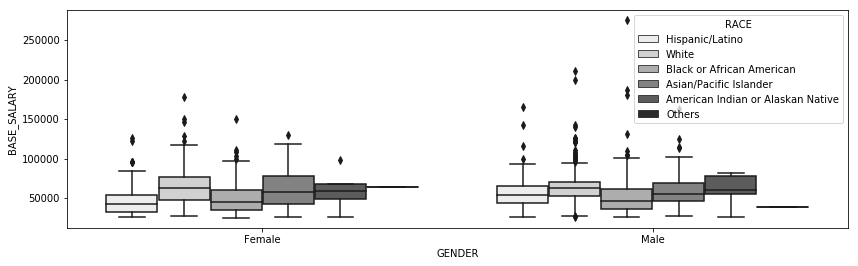

In [13]:
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

C:\Users\Gita Perdani\Miniconda3\envs\name_of_my_env\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5, 0.98, '')

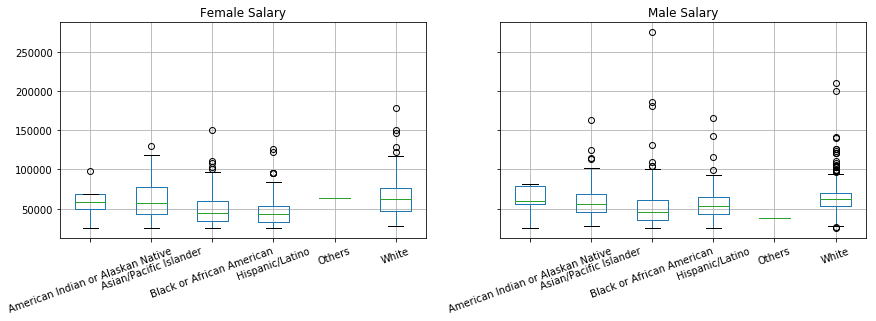

In [14]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
            .boxplot(by='RACE', column='BASE_SALARY', ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

Text(0.5, 0.98, '')

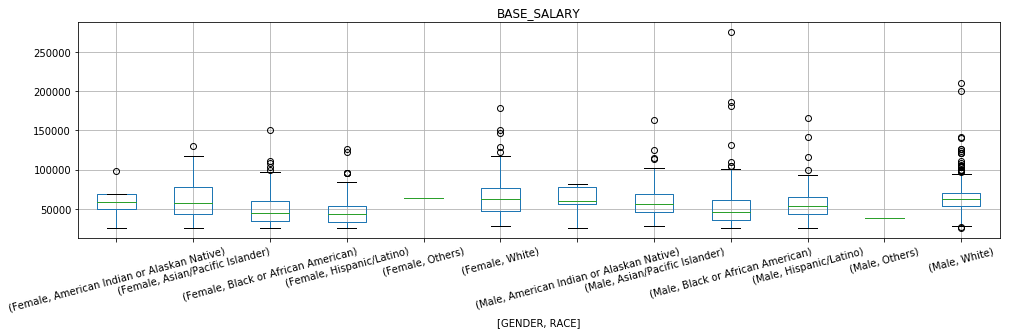

In [15]:
ax = employee.boxplot(by=['GENDER', 'RACE'], 
                      column='BASE_SALARY', 
                      figsize=(16,4), rot=15)
ax.figure.suptitle('')